   # DATA VISUALISATION PROJECT

**Table of Contents**
1. [Basic Analysis](#1)
    * [Frequency](#2)
    * [Male vs Female](#MF)
    * [Top 30 Students](#T)
    
    
    
2. [Data Visualisation](#3)
    * [Count Plot](#4)
    * [Swarm Plot](#5)
    * [Scatter Plot and Hexbin Plot](#6)
    * [Pie Plot](#7)
    * [Histogram](#8)
    * [Heatmap](#9)

In [1]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation

In [2]:
#input data
data = pd.read_csv('C:/Users/parag/OneDrive/Documents/Projects/Data Visualisation/exams large.csv')
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,associate's degree,standard,completed,63,78,80
1,female,group D,associate's degree,standard,none,93,100,95
2,male,group C,some high school,standard,none,63,63,58
3,female,group D,high school,standard,none,67,75,69
4,female,group A,associate's degree,standard,completed,81,100,100
5,male,group E,some college,standard,completed,84,75,69
6,female,group A,bachelor's degree,free/reduced,none,50,69,67
7,male,group D,associate's degree,standard,none,73,69,67
8,male,group D,some college,free/reduced,none,61,55,54
9,female,group C,some college,standard,completed,83,95,94


In [3]:
data.info() #checking data type for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.shape

(1000, 8)

Our data has 8 columns and 1000 rows. Let's do some basic analysis.

<a id ="1"></a>
### Basic Analysis

In [5]:
data.describe() 

,math score,reading score,writing score
count,1000.000000,1000.00000,1000.000000
mean,67.206000,70.16100,69.051000
std,15.369378,14.71719,15.454101
min,16.000000,14.00000,11.000000
25%,57.000000,61.00000,59.000000
50%,68.000000,70.50000,69.000000
75%,78.000000,80.00000,80.000000
max,100.000000,100.00000,100.000000


Now, Let's check for any missing values

In [6]:
print(data.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


There are no missing values in our data. So, we don't need to drop any values.

<a id = "2"></a>
#### Frequency

In [7]:
data['gender'].value_counts()

female    510
male      490
Name: gender, dtype: int64

more female than male in this data.

In [8]:
data.iloc[:,1].value_counts()

group C    309
group D    255
group B    187
group E    155
group A     94
Name: race/ethnicity, dtype: int64

As we can see, group C has the most members compared to the others

In [9]:
data.iloc[:,2].value_counts()

some college          250
associate's degree    190
some high school      187
high school           171
bachelor's degree     131
master's degree        71
Name: parental level of education, dtype: int64

In [10]:
data.iloc[:,3].value_counts()

standard        644
free/reduced    356
Name: lunch, dtype: int64

Many students have standard lunch.

In [11]:
data.iloc[:,4].value_counts()

none         658
completed    342
Name: test preparation course, dtype: int64

It seems that the total number of people who did not complete the course was double that of those who completed the course

<a id = "MF"></a>
#### Male vs Female

In [12]:
male = data[data['gender'] == 'male']
female = data[data['gender'] != 'male']

print("Math Score")
print("Male    :",round(male['math score'].sum()/len(male),3))
print("Female  :",round(female['math score'].sum()/len(female),3),'\n')

print("Reading Score")
print("Male    :",round(male['reading score'].sum()/len(male),3))
print("Female  :",round(female['reading score'].sum()/len(female),3),'\n')

print("Writing Score")
print("Male    :",round(male['writing score'].sum()/len(male),3))
print("Female  :",round(female['writing score'].sum()/len(female),3))

Math Score
Male    : 69.602
Female  : 64.904 

Reading Score
Male    : 66.418
Female  : 73.757 

Writing Score
Male    : 64.192
Female  : 73.72


Male students are better in math. Female students are good in writing and reading.

<a id = "T"></a>
#### Top 30 Students who get very high scores

In [13]:
scores = pd.DataFrame(data['math score'] + data['reading score'] + data['writing score'], columns = ["total score"])
scores = pd.merge(data,scores, left_index = True, right_index = True).sort_values(by=['total score'],ascending=False)
scores.head(30)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
85,female,group E,some college,standard,completed,100,100,100,300
159,female,group E,master's degree,standard,none,100,100,100,300
48,male,group E,master's degree,standard,completed,100,99,100,299
44,male,group E,bachelor's degree,standard,completed,100,99,100,299
795,female,group D,some college,standard,completed,98,100,100,298
975,female,group E,associate's degree,standard,completed,100,100,97,297
68,female,group D,associate's degree,standard,completed,97,100,100,297
964,male,group E,bachelor's degree,standard,completed,100,100,96,296
202,female,group C,associate's degree,standard,completed,95,100,100,295
504,female,group C,master's degree,standard,completed,94,100,100,294


It seems that there are 3 students who are geniuses here, they get perfect scores for all subjects. But, 2 of them didn't complete their test preparation course. Only 2 possibilities: **Genius** or **Cheating**.

From the data, we have seen that students with standard lunch have better score than free/reduce lunch.

____________________________

<a id = "3"></a>
### Data Visualisation

<a id = "4"></a>
#### Count Plot

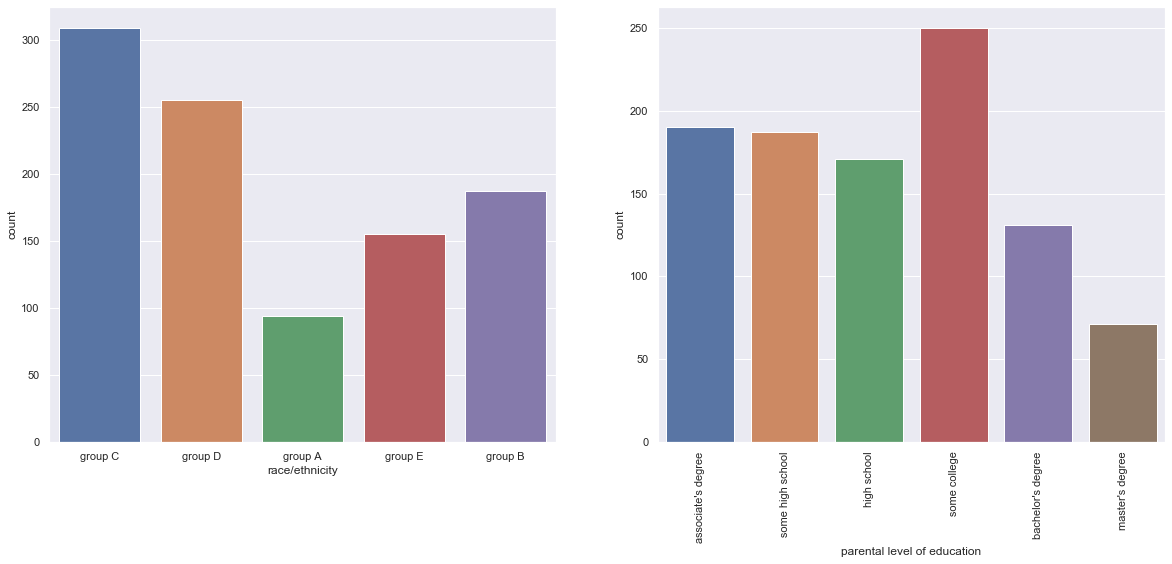

In [14]:
sns.set(style="darkgrid")
f, axs = plt.subplots(1,2, figsize = (20,8))

sns.countplot(x = 'race/ethnicity', data = data, ax = axs[0]) #race / ethnicity
sns.countplot(x = 'parental level of education', data = data, ax = axs[1]) #parental level of education

plt.xticks(rotation=90)

plt.show()

with count plot, we know the number of values for each element in our data. Let's see the data above by dividing it by gender.

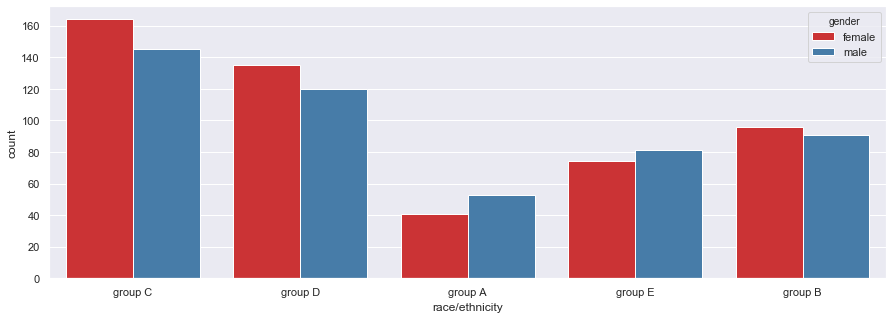

In [15]:
f, ax = plt.subplots(figsize = (15,5))

sns.countplot(x = 'race/ethnicity', data = data, hue = 'gender', palette = 'Set1') #race / ethnicity

plt.show()


Information -  3 out of 5 groups, have the most male.
* Group C has more differences in the number of male and female than the others
* The group with the least number of male is group A, and so are the female 
* The group with the most number of female is group C, and so are the male
<br>
<br>
<br>

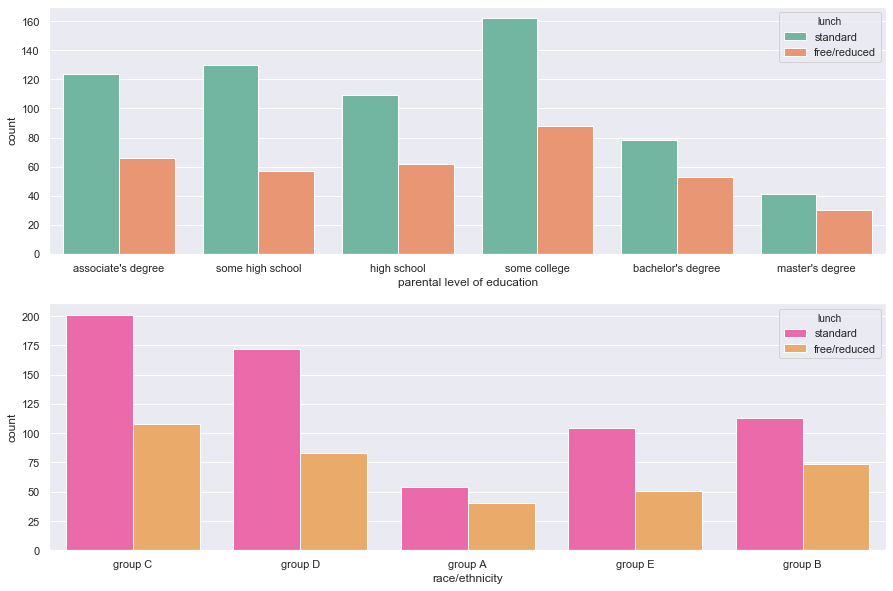

In [16]:
f, axs = plt.subplots(2,1, figsize = (15,10))

sns.countplot(x = 'parental level of education', data = data, hue = 'lunch', ax = axs[0], palette = 'Set2')
sns.countplot(x = 'race/ethnicity', data = data, hue = 'lunch', ax = axs[1] , palette = 'spring')

plt.show()

standard lunches are the majority for each level of education, and so are groups. 

<a id = "5"></a>
#### Swarm Plot
We'll use Swarm plot in our ratio data: Math score, writing score, and reading score. It draw a categorical scatterplot with non-overlapping points.. It is used to show the frequency.

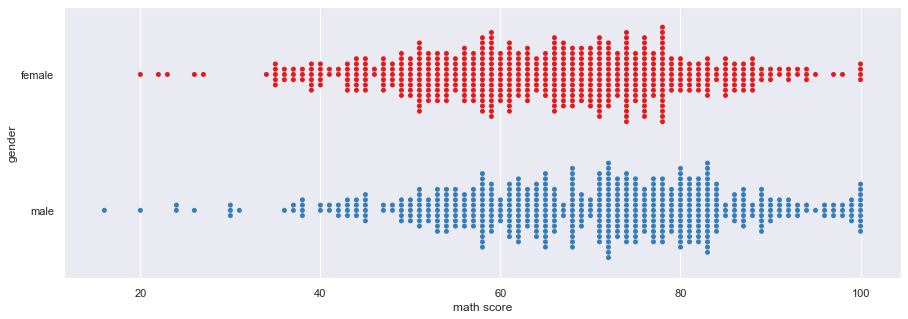

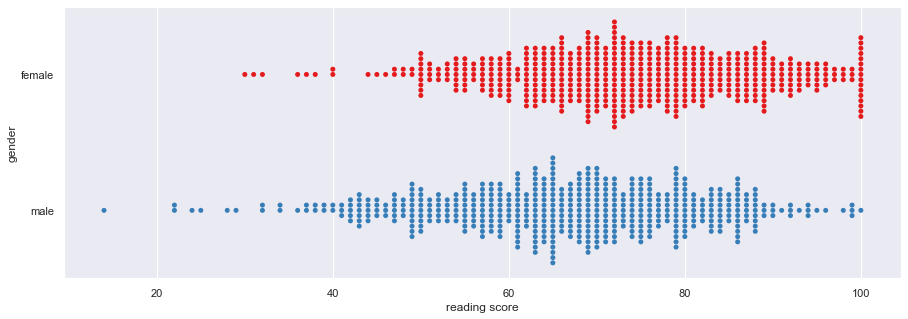

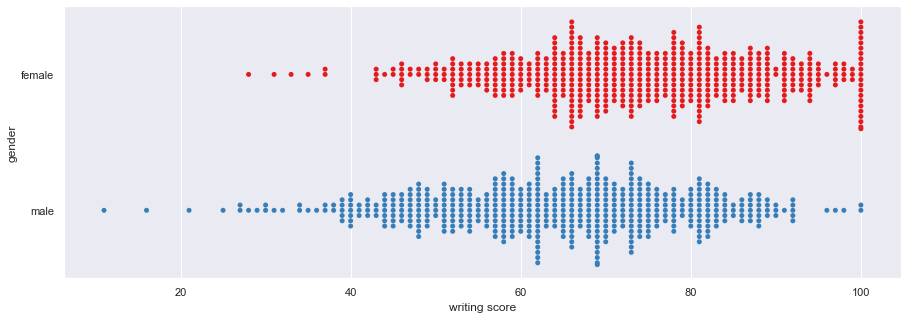

In [17]:
sns.set_style('darkgrid')

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'math score', y='gender', data = data, palette = 'Set1') #math score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'reading score', y='gender', data = data, palette = 'Set1') #reading score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'writing score', y='gender', data = data, palette = 'Set1') #writing score
plt.show()



Inference:
* The majority of students have grades in the range 60-80
* In all subjects, the lowest value is held by female
* Female who get perfect score in writing and reading more than male

<a id = "6"></a>
#### Scatter Plot and Hexbin Plot
The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. We can draw a scatterplot with the matplotlib *plt.scatter* function, and it is also the default kind of plot shown by the **jointplot()** function.

Hexbin plot shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets.

First, we enter math score as x-axis and writing score as y-axis.

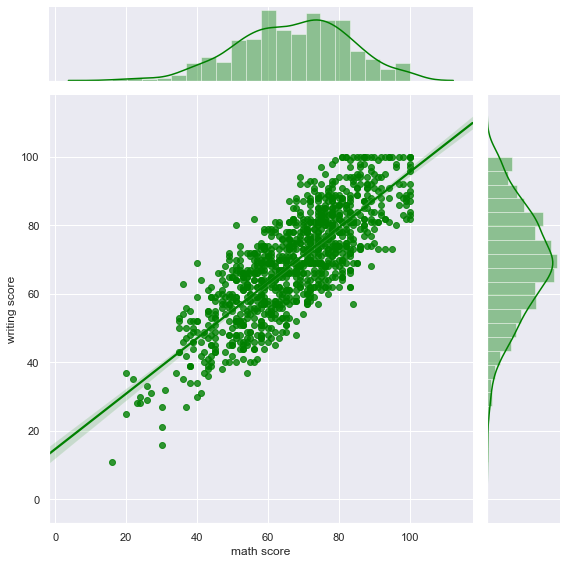

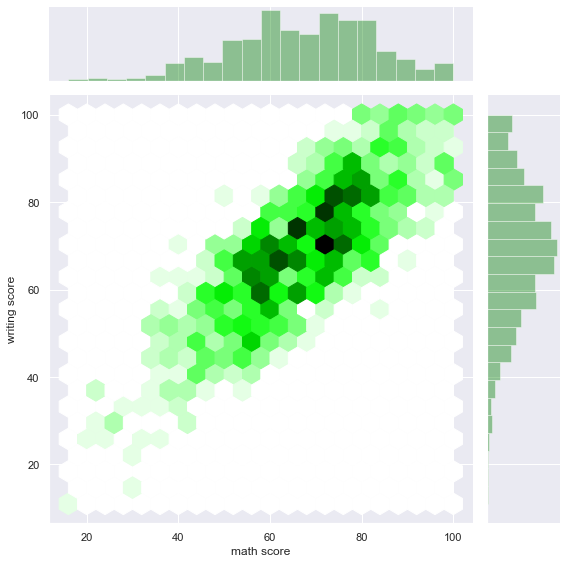

In [18]:
sns.jointplot(x ='math score', y = 'writing score', data = data, color = 'green', height = 8, kind = 'reg')
sns.jointplot(x ='math score', y = 'writing score', data = data, color = 'green', height = 8, kind = 'hex')

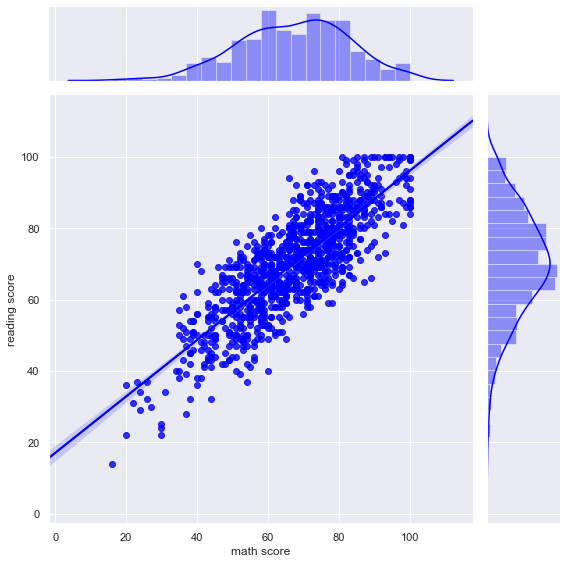

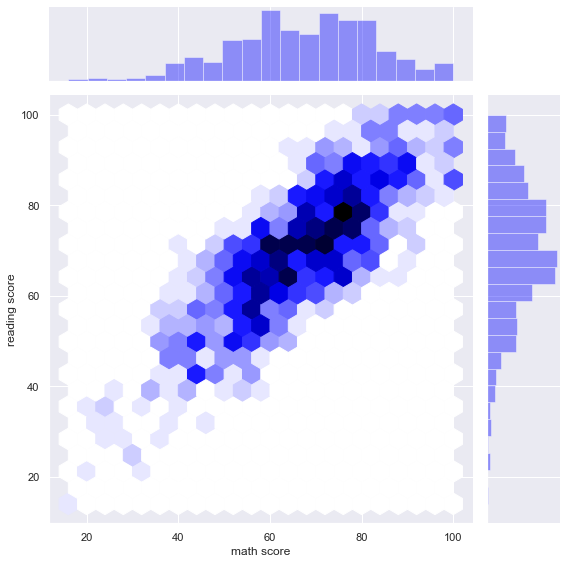

In [19]:
sns.jointplot(x ='math score', y = 'reading score', data = data, color = 'blue', height = 8, kind = 'reg')
sns.jointplot(x ='math score', y = 'reading score', data = data, color = 'blue', height = 8, kind = 'hex')

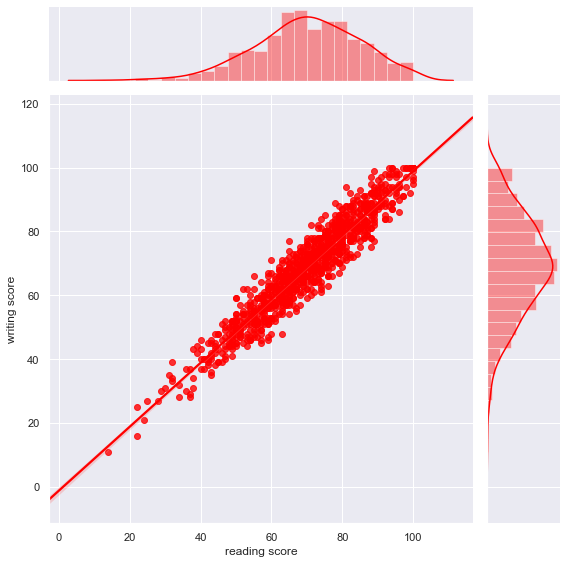

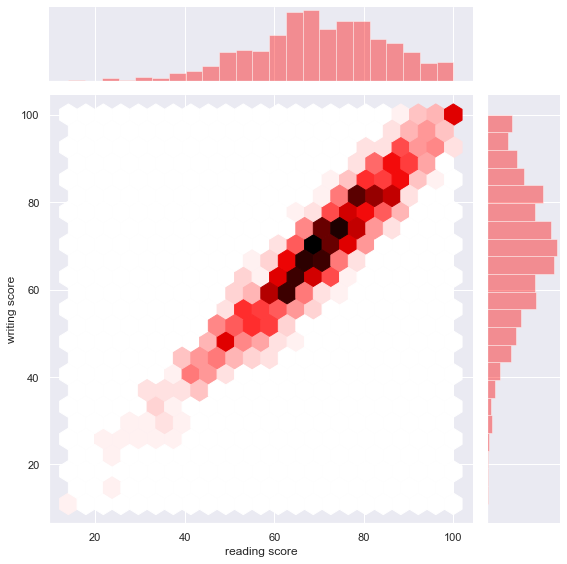

In [20]:
sns.jointplot(x ='reading score', y = 'writing score', data = data, color = 'red', height = 8, kind = 'reg')
sns.jointplot(x ='reading score', y = 'writing score', data = data, color = 'red', height = 8, kind = 'hex')

It seems like all students have a balanced skill between writing and reading.

<a id = "7"></a>
#### Pie Plot
Let's assume if there are students who score < 60, then we determine they did not pass the exam.

In [21]:
#math score
passedm = len(data[data['math score'] >= 60])
not_passedm = 1000 - passedm

percentage1 = [passedm, not_passedm]

#reading score
passedr = len(data[data['reading score'] >= 60])
not_passedr = 1000 - passedr

percentage2 = [passedr, not_passedr]

#writing score
passedw = len(data[data['writing score'] >= 60])
not_passedw = 1000 - passedw

percentage3 = [passedw, not_passedw]

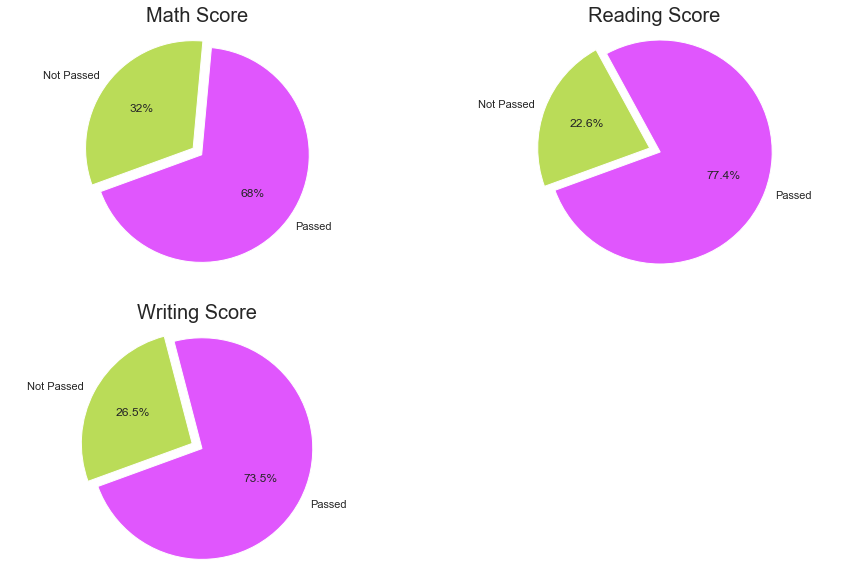

In [22]:
labels = "Passed", "Not Passed"

f, axs = plt.subplots(2,2, figsize=(15,10))

#Math Score
axs[0,0].pie(percentage1, labels = labels, explode=(0.05,0.05), autopct = '%1.f%%', startangle = 200, colors = ["#e056fd", "#badc58"])
axs[0,0].set_title("Math Score", size = 20)
axs[0,0].axis('equal')

#Reading Score
axs[0,1].pie(percentage2, labels = labels, explode=(0.05,0.05), autopct = '%1.1f%%', startangle = 200, colors = ["#e056fd", "#badc58"])
axs[0,1].set_title("Reading Score", size = 20)
axs[0,1].axis('equal')

#Writing Score
axs[1,0].pie(percentage3, labels = labels, explode=(0.05,0.05), autopct = '%1.1f%%', startangle = 200, colors = ["#e056fd", "#badc58"])
axs[1,0].set_title("Writing Score", size = 20)
axs[1,0].axis('equal')

f.delaxes(axs[1,1]) #deleting axs[1,1] so it will be white blank

plt.show()

In [23]:
print("Failed Student")
print("\nMath Student:",not_passedm)
print("Reading Student",not_passedr)
print("Writing Student",not_passedw)

Failed Student

Math Student: 320
Reading Student 226
Writing Student 265


We get some information:
* 320 students didn't pass Math exam
* 226 students didn't pass Reading exam
* 265 students didn't pass Writing exam 

<a id = "8"></a>
#### Histogram
A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

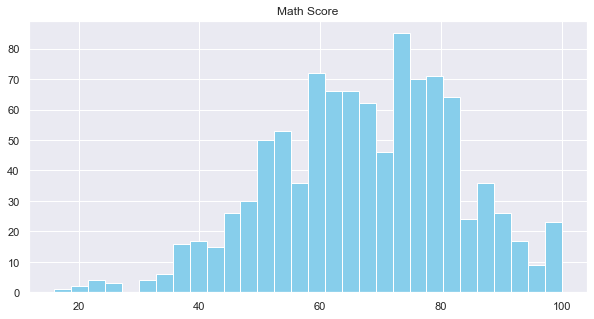

In [24]:
f, ax = plt.subplots(1,1,figsize=(10,5))

plt.hist(data['math score'], 30, color = 'skyblue')
ax.set(title = "Math Score")

plt.show()

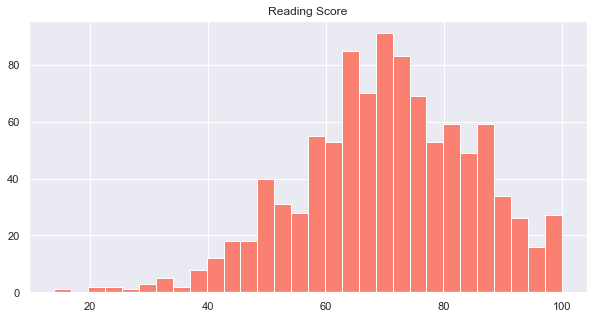

In [25]:
f, ax = plt.subplots(1,1,figsize=(10,5))

plt.hist(data['reading score'], 30, color = 'salmon')
ax.set(title = "Reading Score")

plt.show()

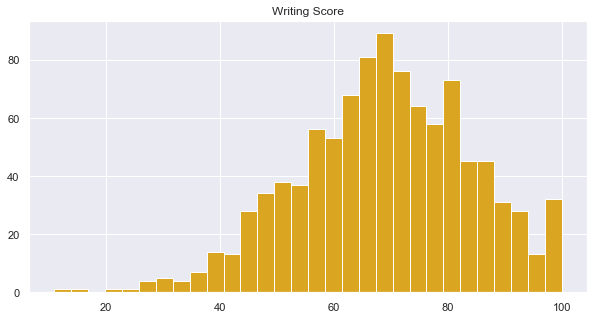

In [26]:
f, ax = plt.subplots(1,1,figsize=(10,5))

plt.hist(data['writing score'], 30, color = 'goldenrod') 
ax.set(title = "Writing Score")

plt.show()

From these plots, It seems students performance in exam is around 60-80. 

<a id = "9"></a>
#### Heat Map
Heat map is useful if you want to see any correlations between attributes. We'll see correlations between math, reading, and writing score.

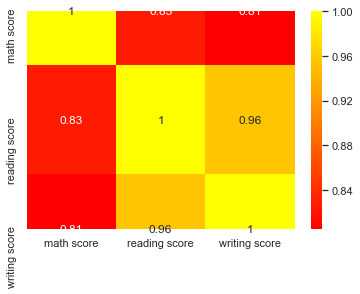

In [27]:
sns.heatmap(data.corr(), annot= True, cmap = 'autumn') #data.corr() used to make correlation matrix

plt.show()

As you can see, writing score and reading score have a strong correlation. This means that if students have good reading skill, it'll affect their writing skill. The lowest correlation is writing score and math score. This pretty makes sense because if you're good at math, it doesn't mean you're good at writing.